Resources:
* read CSV file from Google Cloud Storage: https://stackoverflow.com/a/50201179
* ARIMA model: https://github.com/Nixtla/fpp3-python/blob/main/7%20Forecasting%20with%20decomposition.ipynb

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
from statsforecast import StatsForecast
from statsforecast.models import __all__
from statsforecast.models import RandomWalkWithDrift
import statsmodels.api as sm
from statsforecast.models import AutoARIMA

In [19]:
df = pd.read_csv('gs://austin_traffic_data/Parking_Transactions.csv',
                 dtype={"ID": "int64",
                         "Source": "object",
                         "Duration in Minutes": "float64",
                         "Start Time": "object",
                         "End Time": "object",
                         "Amount": "float64",
                         "Kiosk ID": "object",
                         "App Zone ID": "object",
                         "App Zone Group": "object",
                         "Payment Method": "object",
                         "Location Group": "object",
                         "Last Updated": "object"})

In [20]:
df.head()

,ID,Source,Duration in Minutes,Start Time,End Time,Amount,Kiosk ID,App Zone ID,App Zone Group,Payment Method,Location Group,Last Updated
0,95069185,Parking Meters,60.00000,12/04/2023 01:34:52 PM,12/04/2023 02:34:52 PM,2.25,24002439,NaN,NaN,CARD,East Austin,01/31/2024 09:23:51 AM
1,95069186,Parking Meters,60.00000,12/04/2023 01:34:30 PM,12/04/2023 02:34:30 PM,2.25,10001050,NaN,NaN,CARD,Core,01/31/2024 09:23:51 AM
2,95069191,Parking Meters,15.00000,12/04/2023 01:35:04 PM,12/04/2023 01:50:04 PM,0.50,35001517,NaN,NaN,COINS,West Campus,01/31/2024 09:23:51 AM
3,95313993,Parking Meters,90.00000,12/30/2023 10:49:46 AM,12/30/2023 12:19:46 PM,3.25,24002436,NaN,NaN,CARD,East Austin,01/31/2024 09:27:23 AM
4,95313994,Parking Meters,251.46666,12/30/2023 10:48:32 AM,12/30/2023 03:00:00 PM,10.75,10000127,NaN,NaN,CARD,Core,01/31/2024 09:27:23 AM


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14945335 entries, 0 to 14945334
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ID                   int64  
 1   Source               object 
 2   Duration in Minutes  float64
 3   Start Time           object 
 4   End Time             object 
 5   Amount               float64
 6   Kiosk ID             object 
 7   App Zone ID          object 
 8   App Zone Group       object 
 9   Payment Method       object 
 10  Location Group       object 
 11  Last Updated         object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.3+ GB


In [22]:
df['Start Time DT'] = pd.to_datetime(df['Start Time'], format='%m/%d/%Y %I:%M:%S %p')
df['End Time DT'] = pd.to_datetime(df['End Time'], format='%m/%d/%Y %I:%M:%S %p')
df['Last Updated DT'] = pd.to_datetime(df['End Time'], format='%m/%d/%Y %I:%M:%S %p')
df.head()

,ID,Source,Duration in Minutes,Start Time,End Time,Amount,Kiosk ID,App Zone ID,App Zone Group,Payment Method,Location Group,Last Updated,Start Time DT,End Time DT,Last Updated DT
0,95069185,Parking Meters,60.00000,12/04/2023 01:34:52 PM,12/04/2023 02:34:52 PM,2.25,24002439,NaN,NaN,CARD,East Austin,01/31/2024 09:23:51 AM,2023-12-04 13:34:52,2023-12-04 14:34:52,2023-12-04 14:34:52
1,95069186,Parking Meters,60.00000,12/04/2023 01:34:30 PM,12/04/2023 02:34:30 PM,2.25,10001050,NaN,NaN,CARD,Core,01/31/2024 09:23:51 AM,2023-12-04 13:34:30,2023-12-04 14:34:30,2023-12-04 14:34:30
2,95069191,Parking Meters,15.00000,12/04/2023 01:35:04 PM,12/04/2023 01:50:04 PM,0.50,35001517,NaN,NaN,COINS,West Campus,01/31/2024 09:23:51 AM,2023-12-04 13:35:04,2023-12-04 13:50:04,2023-12-04 13:50:04
3,95313993,Parking Meters,90.00000,12/30/2023 10:49:46 AM,12/30/2023 12:19:46 PM,3.25,24002436,NaN,NaN,CARD,East Austin,01/31/2024 09:27:23 AM,2023-12-30 10:49:46,2023-12-30 12:19:46,2023-12-30 12:19:46
4,95313994,Parking Meters,251.46666,12/30/2023 10:48:32 AM,12/30/2023 03:00:00 PM,10.75,10000127,NaN,NaN,CARD,Core,01/31/2024 09:27:23 AM,2023-12-30 10:48:32,2023-12-30 15:00:00,2023-12-30 15:00:00


In [29]:
df['Date'] = df['Start Time DT'].dt.date
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,ID,Source,Duration in Minutes,Start Time,End Time,Amount,Kiosk ID,App Zone ID,App Zone Group,Payment Method,Location Group,Last Updated,Start Time DT,End Time DT,Last Updated DT,Date
0,95069185,Parking Meters,60.00000,12/04/2023 01:34:52 PM,12/04/2023 02:34:52 PM,2.25,24002439,NaN,NaN,CARD,East Austin,01/31/2024 09:23:51 AM,2023-12-04 13:34:52,2023-12-04 14:34:52,2023-12-04 14:34:52,2023-12-04
1,95069186,Parking Meters,60.00000,12/04/2023 01:34:30 PM,12/04/2023 02:34:30 PM,2.25,10001050,NaN,NaN,CARD,Core,01/31/2024 09:23:51 AM,2023-12-04 13:34:30,2023-12-04 14:34:30,2023-12-04 14:34:30,2023-12-04
2,95069191,Parking Meters,15.00000,12/04/2023 01:35:04 PM,12/04/2023 01:50:04 PM,0.50,35001517,NaN,NaN,COINS,West Campus,01/31/2024 09:23:51 AM,2023-12-04 13:35:04,2023-12-04 13:50:04,2023-12-04 13:50:04,2023-12-04
3,95313993,Parking Meters,90.00000,12/30/2023 10:49:46 AM,12/30/2023 12:19:46 PM,3.25,24002436,NaN,NaN,CARD,East Austin,01/31/2024 09:27:23 AM,2023-12-30 10:49:46,2023-12-30 12:19:46,2023-12-30 12:19:46,2023-12-30
4,95313994,Parking Meters,251.46666,12/30/2023 10:48:32 AM,12/30/2023 03:00:00 PM,10.75,10000127,NaN,NaN,CARD,Core,01/31/2024 09:27:23 AM,2023-12-30 10:48:32,2023-12-30 15:00:00,2023-12-30 15:00:00,2023-12-30


In [39]:
df['Quarter'] = df['Start Time DT'].dt.to_period('Q')
df.head()

,ID,Source,Duration in Minutes,Start Time,End Time,Amount,Kiosk ID,App Zone ID,App Zone Group,Payment Method,Location Group,Last Updated,Start Time DT,End Time DT,Last Updated DT,Date,Quarter
0,95069185,Parking Meters,60.00000,12/04/2023 01:34:52 PM,12/04/2023 02:34:52 PM,2.25,24002439,NaN,NaN,CARD,East Austin,01/31/2024 09:23:51 AM,2023-12-04 13:34:52,2023-12-04 14:34:52,2023-12-04 14:34:52,2023-12-04,2023Q4
1,95069186,Parking Meters,60.00000,12/04/2023 01:34:30 PM,12/04/2023 02:34:30 PM,2.25,10001050,NaN,NaN,CARD,Core,01/31/2024 09:23:51 AM,2023-12-04 13:34:30,2023-12-04 14:34:30,2023-12-04 14:34:30,2023-12-04,2023Q4
2,95069191,Parking Meters,15.00000,12/04/2023 01:35:04 PM,12/04/2023 01:50:04 PM,0.50,35001517,NaN,NaN,COINS,West Campus,01/31/2024 09:23:51 AM,2023-12-04 13:35:04,2023-12-04 13:50:04,2023-12-04 13:50:04,2023-12-04,2023Q4
3,95313993,Parking Meters,90.00000,12/30/2023 10:49:46 AM,12/30/2023 12:19:46 PM,3.25,24002436,NaN,NaN,CARD,East Austin,01/31/2024 09:27:23 AM,2023-12-30 10:49:46,2023-12-30 12:19:46,2023-12-30 12:19:46,2023-12-30,2023Q4
4,95313994,Parking Meters,251.46666,12/30/2023 10:48:32 AM,12/30/2023 03:00:00 PM,10.75,10000127,NaN,NaN,CARD,Core,01/31/2024 09:27:23 AM,2023-12-30 10:48:32,2023-12-30 15:00:00,2023-12-30 15:00:00,2023-12-30,2023Q4


In [64]:
group_freq_date = df.groupby(['Date', 'Location Group']).size().reset_index(name='frequency')
group_freq_date['ds'] = group_freq_date['Date']
group_freq_date.drop(columns=['Date'], inplace=True)
group_freq_date["unique_id"] = "group_frequency"
group_freq_date

,Location Group,frequency,ds,unique_id
0,East Austin,78,2019-12-31,group_frequency
1,IH 35 Lot,20,2019-12-31,group_frequency
2,MACC Lot,16,2019-12-31,group_frequency
3,Toomey,5,2019-12-31,group_frequency
4,Austin High,8,2020-01-01,group_frequency
...,...,...,...,...
29950,Unknown Location,3,2025-02-08,group_frequency
29951,Walsh,8,2025-02-08,group_frequency
29952,Walter,9,2025-02-08,group_frequency
29953,West Campus,46,2025-02-08,group_frequency


In [67]:
group_freq_date_wampus = group_freq_date[group_freq_date['Location Group'] == 'West Campus']
group_freq_date_wampus

,Location Group,frequency,ds,unique_id
19,West Campus,123,2020-01-01,group_frequency
36,West Campus,455,2020-01-02,group_frequency
53,West Campus,552,2020-01-03,group_frequency
67,West Campus,489,2020-01-04,group_frequency
94,West Campus,589,2020-01-06,group_frequency
...,...,...,...,...
29880,West Campus,526,2025-02-04,group_frequency
29899,West Campus,576,2025-02-05,group_frequency
29919,West Campus,601,2025-02-06,group_frequency
29939,West Campus,837,2025-02-07,group_frequency


In [47]:
group_freq_quarter = df.groupby(['Quarter', 'Location Group']).size().reset_index(name='frequency')
group_freq_quarter

,Quarter,Location Group,frequency
0,2019Q4,East Austin,78
1,2019Q4,IH 35 Lot,20
2,2019Q4,MACC Lot,16
3,2019Q4,Toomey,5
4,2020Q1,Austin High,4139
...,...,...,...
440,2025Q1,Unknown Location,18462
441,2025Q1,Walsh,388
442,2025Q1,Walter,795
443,2025Q1,West Campus,19999


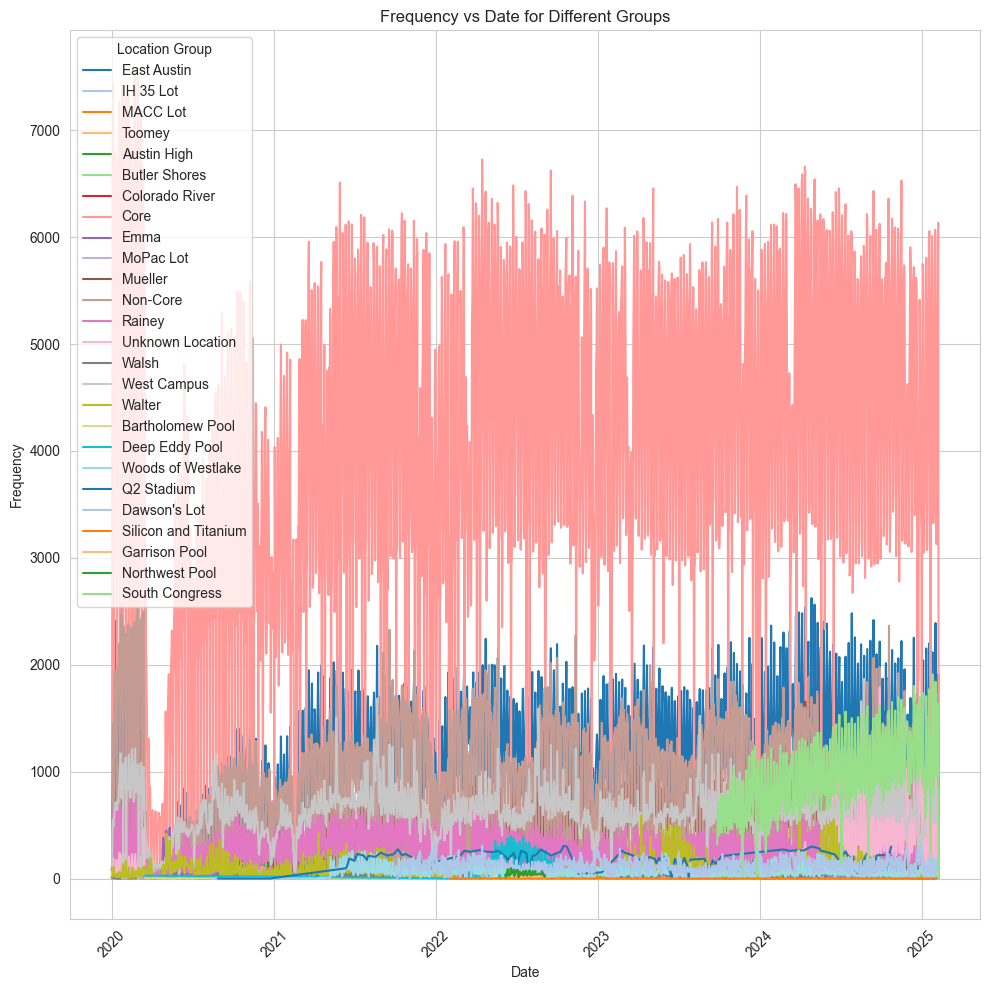

In [46]:
group_cnt = group_freq_date['Location Group'].unique().size

# Plotting
plt.figure(figsize=(10, 10))

palette = sns.color_palette("tab20", n_colors=group_cnt)
sns.lineplot(data=group_freq_date, x='Date', y='frequency', hue='Location Group', palette=palette,) #  marker='o'


# Customize plot
plt.title('Frequency vs Date for Different Groups')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping

# Show plot
plt.show()

In [53]:
# the mstl() function performs decomposition of a time series into seasonal, trend and irregular components using Loess:
def mstl(x, period, blambda=None, s_window=7 + 4 * np.arange(1, 7)):
    origx = x
    n = len(x)
    msts = period
    # iterate = 1
    if x.ndim == 2:
        x = x[:, 0]
    if np.isnan(x).any():
        ...  # na.interp
    if blambda is not None:
        ...  # boxcox
    # tt = np.arange(n)
    if msts > 1:
        fit = sm.tsa.STL(x, period=msts, seasonal=s_window[0]).fit()
        seas = fit.seasonal
        deseas = x - seas
        trend = fit.trend
    else:
        try:
            from supersmoother import SuperSmoother
        except ImportError as e:
            print("supersmoother is required for mstl with period=1")
            raise e
        msts = None
        deseas = x
        t = 1 + np.arange(n)
        trend = SuperSmoother().fit(t, x).predict(t)
    deseas[np.isnan(origx)] = np.nan
    remainder = deseas - trend
    output = {"data": origx, "trend": trend}
    if msts is not None:
        output["seasonal"] = seas
    output["remainder"] = remainder
    return pd.DataFrame(output)

In [68]:
# Decompose a time series:
mstl_df = mstl(group_freq_date_wampus['frequency'].values, 12, blambda=None, s_window=7 + 4 * np.arange(1, 7))
mstl_df

,data,trend,seasonal,remainder
0,123,361.618109,-156.746580,-81.871529
1,455,400.865054,25.762382,28.372563
2,552,439.667561,51.044591,61.287848
3,489,478.024166,124.820594,-113.844759
4,589,515.910173,239.549443,-166.459616
...,...,...,...,...
1586,526,553.400476,-275.700230,248.299754
1587,576,536.086839,-21.100768,61.013929
1588,601,518.447738,-18.115181,100.667443
1589,837,500.252074,231.843545,104.904381


In [70]:
# Create a dataframe with trend values:
trend_freq_df = pd.DataFrame()
trend_freq_df['ds']  = group_freq_date_wampus['ds']
trend_freq_df['seasonally_adjusted_comp'] = mstl_df['trend']
trend_freq_df["unique_id"] = "seasonally_adjusted_comp"

trend_freq_df

,ds,seasonally_adjusted_comp,unique_id
19,2020-01-01,854.364817,seasonally_adjusted_comp
36,2020-01-02,901.975736,seasonally_adjusted_comp
53,2020-01-03,840.402794,seasonally_adjusted_comp
67,2020-01-04,619.308170,seasonally_adjusted_comp
94,2020-01-06,124.285014,seasonally_adjusted_comp
...,...,...,...
29880,2025-02-04,NaN,seasonally_adjusted_comp
29899,2025-02-05,NaN,seasonally_adjusted_comp
29919,2025-02-06,NaN,seasonally_adjusted_comp
29939,2025-02-07,NaN,seasonally_adjusted_comp


In [74]:
# Define the model, fit and predict:


models = [AutoARIMA(season_length=12, approximation=True)]

fcst = StatsForecast(
                     models=models,
                     freq="D",
                     n_jobs=-1)

levels = [80, 95]

forecasts = fcst.forecast(df=trend_freq_df,h=20, level=levels, target_col='seasonally_adjusted_comp')

/Users/anjieliu/Library/Python/3.9/lib/python/site-packages/statsforecast/arima.py:1283: UserWarning: The chosen seasonal unit root test encountered an error when testing for the 0 difference.
From seas(): `mstl` cannot handle missing values. Please raise an issue to include this feature.
0 seasonal differences will be used. Consider using a different unit root test.
  warnings.warn(
/Users/anjieliu/Library/Python/3.9/lib/python/site-packages/statsforecast/arima.py:479: UserWarning: possible convergence problem: minimize gave code 3]
  warnings.warn(
/Users/anjieliu/Library/Python/3.9/lib/python/site-packages/statsforecast/arima.py:479: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(


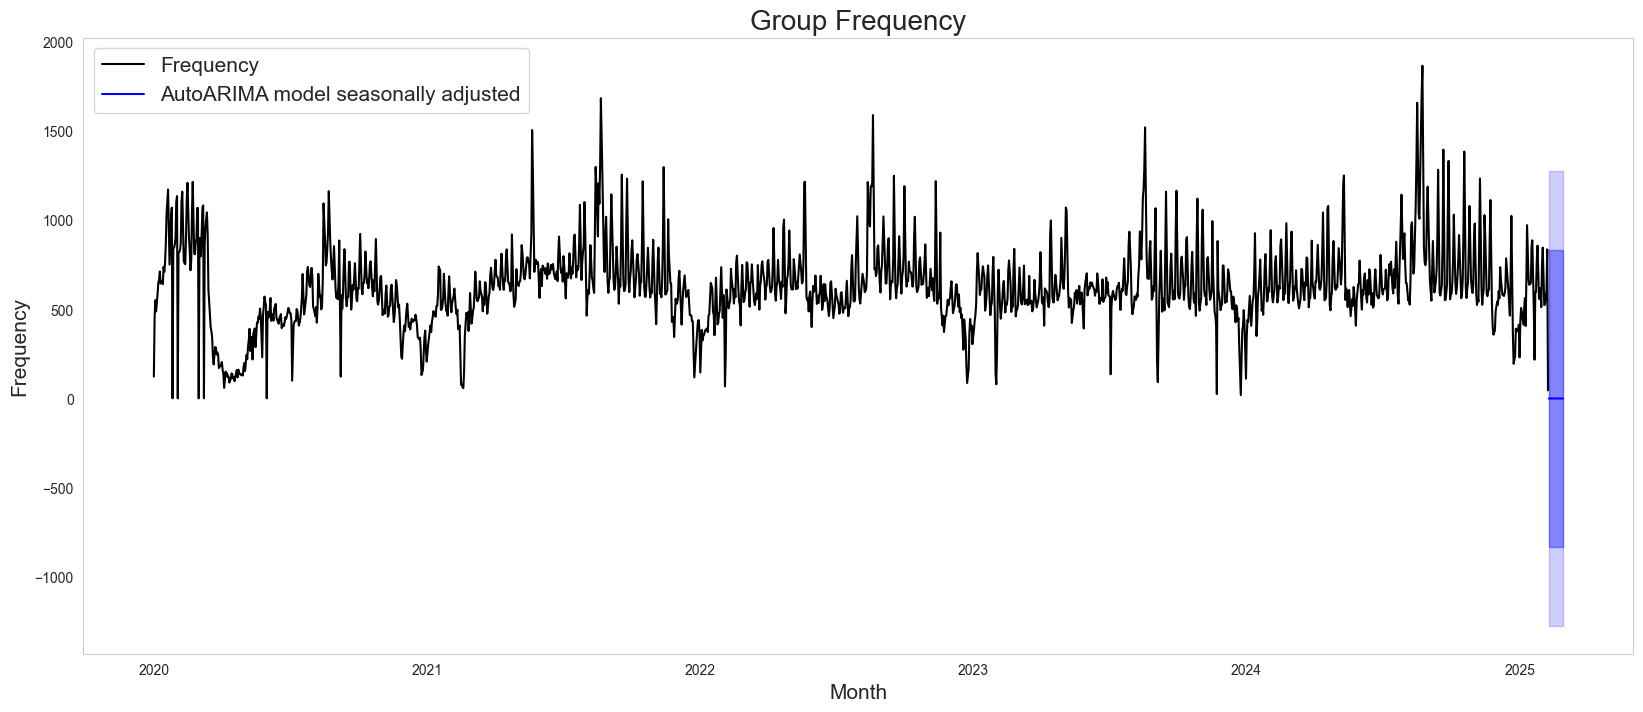

In [75]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
trend_fore_df = pd.concat([group_freq_date_wampus, forecasts]).set_index('ds')
plt.plot(trend_fore_df['frequency'], 'k-', trend_fore_df['AutoARIMA'], 'b-')

# Specify graph features:
ax.fill_between(trend_fore_df.index,
                trend_fore_df['AutoARIMA-lo-80'],
                trend_fore_df['AutoARIMA-hi-80'],
                alpha=.35,
                color='blue',
                label='auto_arima_level_80')
ax.fill_between(trend_fore_df.index,
                trend_fore_df['AutoARIMA-lo-95'],
                trend_fore_df['AutoARIMA-hi-95'],
                alpha=.2,
                color='blue',
                label='auto_arima_level_95')
ax.set_title('Group Frequency', fontsize=20)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_xlabel('Month', fontsize=15)
ax.legend(prop={'size': 15})
ax.legend(['Frequency', 'AutoARIMA model seasonally adjusted'], prop={'size': 15})
ax.grid()

In [83]:
def group_ts(group="West Campus"):
    temp = group_freq_date[group_freq_date['Location Group'] == 'West Campus']
    temp = temp.dropna()
    #print(temp.isnull().sum())
    mstl_df = mstl(temp['frequency'].values, 12, blambda=None, s_window=7 + 4 * np.arange(1, 7))
    trend_freq_df = pd.DataFrame()
    trend_freq_df['ds']  = temp['ds']
    trend_freq_df['seasonally_adjusted_comp'] = mstl_df['trend']
    trend_freq_df["unique_id"] = "seasonally_adjusted_comp"
    models = [AutoARIMA(season_length=12, approximation=True)]
    fcst = StatsForecast(
                         models=models,
                         freq="D",
                         n_jobs=-1)

    levels = [80, 95]
    forecasts = fcst.forecast(df=trend_freq_df,h=20, level=levels, target_col='seasonally_adjusted_comp')
    fig, ax = plt.subplots(1, 1, figsize = (20, 8))

    # Concatenate the dataframe of predicted values with the dataframe of observed values:
    trend_fore_df = pd.concat([temp, forecasts]).set_index('ds')
    plt.plot(trend_fore_df['frequency'], 'k-', trend_fore_df['AutoARIMA'], 'b-')

    # Specify graph features:
    ax.fill_between(trend_fore_df.index,
                    trend_fore_df['AutoARIMA-lo-80'],
                    trend_fore_df['AutoARIMA-hi-80'],
                    alpha=.35,
                    color='blue',
                    label='auto_arima_level_80')
    ax.fill_between(trend_fore_df.index,
                    trend_fore_df['AutoARIMA-lo-95'],
                    trend_fore_df['AutoARIMA-hi-95'],
                    alpha=.2,
                    color='blue',
                    label='auto_arima_level_95')
    ax.set_title(group, fontsize=20)
    ax.set_ylabel('Frequency', fontsize=15)
    ax.set_xlabel('Day', fontsize=15)
    ax.legend(prop={'size': 15})
    ax.legend(['Frequency', 'AutoARIMA model seasonally adjusted'], prop={'size': 15})
    ax.grid()

/Users/anjieliu/Library/Python/3.9/lib/python/site-packages/statsforecast/arima.py:1283: UserWarning: The chosen seasonal unit root test encountered an error when testing for the 0 difference.
From seas(): `mstl` cannot handle missing values. Please raise an issue to include this feature.
0 seasonal differences will be used. Consider using a different unit root test.
  warnings.warn(
/Users/anjieliu/Library/Python/3.9/lib/python/site-packages/statsforecast/arima.py:479: UserWarning: possible convergence problem: minimize gave code 3]
  warnings.warn(
/Users/anjieliu/Library/Python/3.9/lib/python/site-packages/statsforecast/arima.py:479: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(


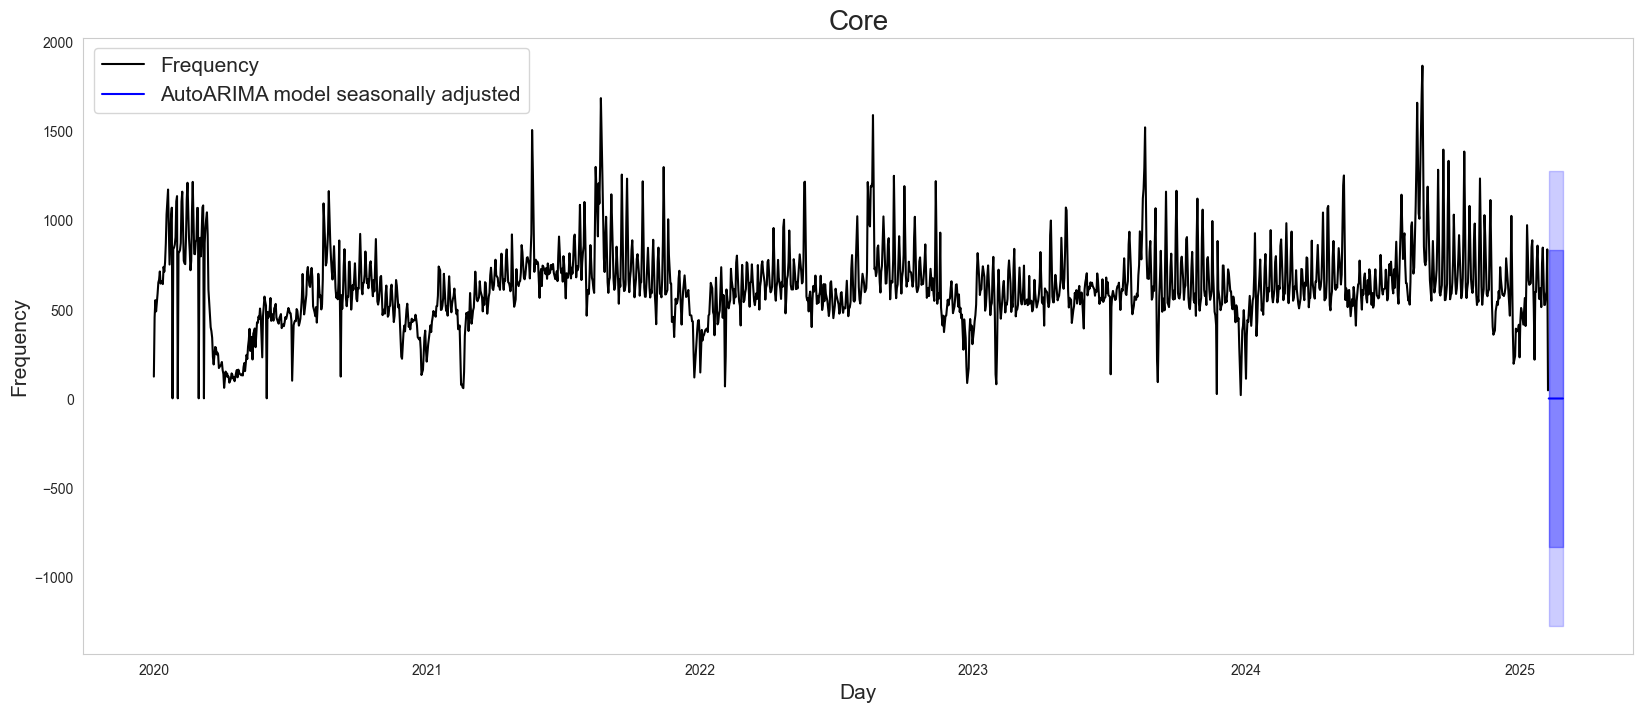

In [84]:
group_ts("Core")